# Creating pre-clean dataset 

In [42]:
#importing all databases with Twitter data
from os import listdir
import pandas as pd 
path = r'./data' # use your path

filepaths = [f for f in listdir(".") if f.endswith('.csv')]
li = []

#reading all datasets
for filename in filepaths:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

database = pd.concat(li, axis=0, ignore_index=True)

In [43]:
#columns in the dataset
for col in database.columns: 
    print(col) 

Unnamed: 0
got_criteria
company
tweet_text
date
hashtags
retweets
favorites
mentions
Company
Sector
Name to search
Status


In [44]:
database["company"].unique()

array(['US Bank', 'Truist', 'PNC Financial', 'Wells Fargo', 'Twitter',
       'HP', 'Dell', 'Uber', "Macy's", 'Nordstrom', "Kohl's", 'CVS',
       'J & J ', 'P&G ', 'Colgate-Palmolive', 'Walgreens',
       'General Mills', 'Coca-Cola', 'Ralph Lauren', 'Costco', 'TJX',
       'Home Depot', 'Walmart', 'Target', 'Lowes', 'Ross', 'Dollar tree',
       'Dollar General', 'Apple', 'Amazon', 'Facebook',
       'Alphabet (class A,C)', nan, 'Monster Beverage', 'Tyson Foods',
       'Hershey', 'Kellog', 'Kroger', 'Kraft Heinz', 'Smucker',
       'Campbell Soup', 'Molson Coors', 'Darden Restaurants', 'Snap Inc.',
       'Spotify', 'AT&T', 'T-Mobile', 'Sprint', 'Verizon',
       'JPMorgan & Chase', 'Citigroup', 'Bank of America'], dtype=object)

In [45]:
#dropping unececessary columns
database = database.drop(columns = ["got_criteria", "Unnamed: 0", "Company", "Sector", "Name to search", "mentions", "Status"])

In [46]:
#head dataset
database.head()

,company,tweet_text,date,hashtags,retweets,favorites
0,US Bank,#Skol #us bank stadium. #itsmillertime. Go Vik...,2017-01-01 18:30:51+00:00,#Skol #us #itsmillertime,0.0,0.0
1,US Bank,"#US, #UK and #EUropen Countries #VBA (#VIRTUAL...",2017-01-01 08:28:13+00:00,#US #UK #EUropen #VBA #VIRTUAL #BANK #ACCOUNT ...,0.0,0.0
2,US Bank,#Marijuana-related businesses should get bette...,2017-01-02 13:22:33+00:00,#Marijuana #US,0.0,0.0
3,US Bank,#US Senators propose better bank access for ma...,2017-01-02 12:22:01+00:00,#US,3.0,5.0
4,US Bank,#US Senators propose better bank access for #m...,2017-01-02 21:26:56+00:00,#US #marijuana,0.0,1.0


In [51]:
#combining with company sector defined by us
initial_database = pd.read_csv("companies.csv").rename(str.lower, axis='columns')

database.merge(initial_database, on='company', how='left')


,company,tweet_text,date,hashtags,retweets,favorites,sector,name to search,status
0,US Bank,#Skol #us bank stadium. #itsmillertime. Go Vik...,2017-01-01 18:30:51+00:00,#Skol #us #itsmillertime,0.0,0.0,NaN,NaN,NaN
1,US Bank,"#US, #UK and #EUropen Countries #VBA (#VIRTUAL...",2017-01-01 08:28:13+00:00,#US #UK #EUropen #VBA #VIRTUAL #BANK #ACCOUNT ...,0.0,0.0,NaN,NaN,NaN
2,US Bank,#Marijuana-related businesses should get bette...,2017-01-02 13:22:33+00:00,#Marijuana #US,0.0,0.0,NaN,NaN,NaN
3,US Bank,#US Senators propose better bank access for ma...,2017-01-02 12:22:01+00:00,#US,3.0,5.0,NaN,NaN,NaN
4,US Bank,#US Senators propose better bank access for #m...,2017-01-02 21:26:56+00:00,#US #marijuana,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1547271,Bank of America,Large-denomination bills were in such high dem...,2020-03-17 12:52:05+00:00,#bank #banking #riskmanagement #risk,0.0,0.0,NaN,NaN,NaN
1547272,Bank of America,Large-denomination bills were in such high dem...,2020-03-18 17:21:20+00:00,#bank #banking #riskmanagement #risk,0.0,0.0,NaN,NaN,NaN
1547273,Bank of America,@BankofAmerica #bank of America.we were reques...,2020-03-18 10:45:58+00:00,#bank,0.0,0.0,NaN,NaN,NaN
1547274,Bank of America,#Bank of America: Recession Is Already Here ht...,2020-03-19 18:06:49+00:00,#Bank,0.0,1.0,NaN,NaN,NaN


In [52]:
#converting the twitter text to string
database["tweet_text"] = database["tweet_text"].apply(str) 

In [53]:
#dropping NA
database = database[database.tweet_text != 'nan']
database.reset_index(drop=True,inplace=True)

In [54]:
#adding a column with length of text pre cleaning
database['pre_clean_len'] = [len(t) for t in database.tweet_text]

/Users/martabras/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
#first draft of the data dictionary for the dataset
from pprint import pprint
data_dict = {

    'text':{
        'type':database.tweet_text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':database.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':database.shape
}
pprint(data_dict)

{'dataset_shape': (1547148, 7),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


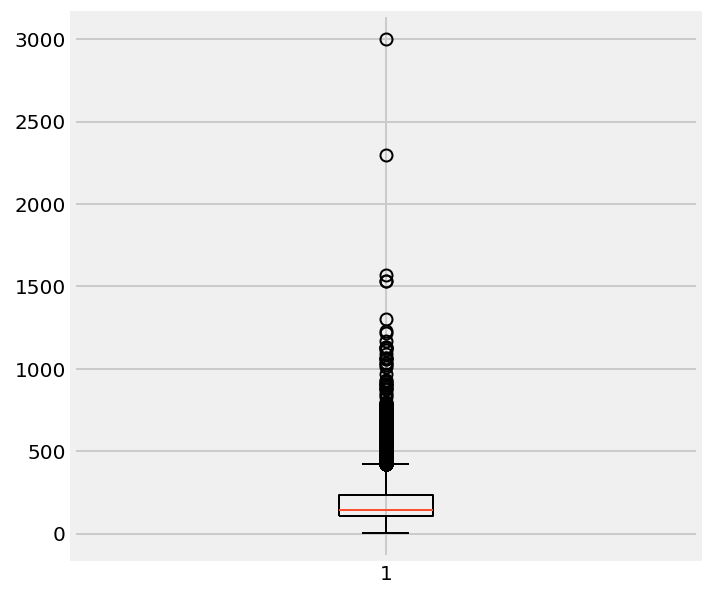

In [56]:
#boxplot of the length of tweet text
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(database.pre_clean_len)
plt.show()

There is a high dispersion in length of tweets. While the median is bellow 250, there are posts much lengthier.

In [16]:
database.tweet_text[database.pre_clean_len > 1000]

49586      We released an update for SUPER PINBALL MAKER!...
208261     https://www.amazon.com/KINGSLONG-Backpack-Comp...
208295     https://www.amazon.com/KINGSLONG-Backpack-Comp...
208488     https://www.amazon.com/KINGSLONG-Backpack-Comp...
208530     https://www.amazon.com/KINGSLONG-Backpack-Comp...
270721     Horrific, Life threatening experience in an UB...
300879     Here's what I've found $319 here can't vouch f...
410002     *SPECIAL BREAKING NEWS*- QL RADIO Will Be Feat...
448393     #VacancyCO #RealEstate, #PropertyPro.ng, #Lago...
448689     #VacancyCCO #Tripz Nigeria, #Lagos: #CUSTOMER ...
822323     #TARGET #UNKT These data are not final. Work i...
837429     I just entered to win a $100 #Target Gift card...
1002112    ENTER #Win a $100 #Amazon #Gift #card with @Bo...
1002475    Celebrate Romance Enter to #Win a NEW #Kindle ...
1008860    RT and ENTER Daily to #Win a #$50 #Amazon #Gif...
1010477    Spring into Summer #giveaway #Romance Multi-Au...
1012943    RT ENTER to #

It seems like there are comments that have websites on and others that are advertising products. Also, there seems to be some repeated comments. 

In [57]:
#removing duplicates from dataset
database = database.drop_duplicates(subset='tweet_text', keep='first')

In [58]:
database.tweet_text[database.pre_clean_len > 1000]

49586      We released an update for SUPER PINBALL MAKER!...
208261     https://www.amazon.com/KINGSLONG-Backpack-Comp...
208295     https://www.amazon.com/KINGSLONG-Backpack-Comp...
208488     https://www.amazon.com/KINGSLONG-Backpack-Comp...
208530     https://www.amazon.com/KINGSLONG-Backpack-Comp...
270721     Horrific, Life threatening experience in an UB...
300879     Here's what I've found $319 here can't vouch f...
410002     *SPECIAL BREAKING NEWS*- QL RADIO Will Be Feat...
448393     #VacancyCO #RealEstate, #PropertyPro.ng, #Lago...
448689     #VacancyCCO #Tripz Nigeria, #Lagos: #CUSTOMER ...
822323     #TARGET #UNKT These data are not final. Work i...
837429     I just entered to win a $100 #Target Gift card...
1002112    ENTER #Win a $100 #Amazon #Gift #card with @Bo...
1002475    Celebrate Romance Enter to #Win a NEW #Kindle ...
1008860    RT and ENTER Daily to #Win a #$50 #Amazon #Gif...
1010477    Spring into Summer #giveaway #Romance Multi-Au...
1012943    RT ENTER to #

In [59]:
#removing companies that are not prepared yet
database = database[database.company != 'US Bank']


# Data Preparation 

## Cleaning the data

In [60]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

#removing @mentions
pat1 = r'@[A-Za-z0-9_]+'
#removing urls
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    #Decoding HTML to general text 
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        #BOM will be replaced with unicode unrecognisable special characters, then I can process this as “?”
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
        
    stripped = re.sub(combined_pat, '', bom_removed)
    
    stripped = re.sub(www_pat, '', stripped)
    
    lower_case = stripped.lower()
    
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    #removing hasthags, numbers
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()



test_result = []
for t in database["tweet_text"]:
    test_result.append(tweet_cleaner_updated(t))


In [61]:
database = database.reset_index()

print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(0, len (database['tweet_text'])):
    #if( (i+1)%10000 == 0 ):
        #print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                  
    clean_tweet_texts.append(tweet_cleaner_updated(database['tweet_text'][i]))

Cleaning and parsing the tweets...



In [62]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df.head()

,text
0,now let me go step further did show disdain at...
1,tryna get that official league license so can ...
2,showing up with some goods too hmu truist
3,should drop some sfgiants inspired stuff with ...
4,check out truist skincare lotion infused moist...


## Exporting CSV file

In [63]:
#adding clean column to initial dataset
database["clean_text"] = clean_df["text"]
database.to_csv('./clean_tweet.csv',encoding='utf-8')